In [56]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import argparse

from utils import (
    # save_checkpoint, 
    # visualize, 
    load_data, 
    # balance,
    # similarity_matrix
)

In [12]:
parser = argparse.ArgumentParser()
parser.add_argument('data')
args = parser.parse_args(args=['census_income'])
data = load_data(args, merged=True)[0]
data

In [33]:
checkpoints = torch.load('resulting_clusterings-wo_rho/census_income/best_dec_nclusters2_g100.0_run10.pt', map_location=torch.device('cpu'))


In [71]:
pd.DataFrame({'datasets': [d]*len(checkpoints['loss_iterations']),
                                            'gamma': [g]*len(checkpoints['loss_iterations']),
                                            'iteration': [x for x in range(len(checkpoints['loss_iterations']))],
                                            'loss': checkpoints['loss_iterations'],
                                            'balance': [min(x1,x2) for x1,x2 in checkpoints['balance_iterations']]})

,datasets,gamma,iteration,loss,balance
0,census_income,10.0,0,0.182640,0.452695
1,census_income,10.0,1,0.053219,0.452763
2,census_income,10.0,2,0.039743,0.452653
3,census_income,10.0,3,0.037822,0.452567
4,census_income,10.0,4,0.037604,0.452494
...,...,...,...,...,...
145,census_income,10.0,145,0.049886,0.323806
146,census_income,10.0,146,0.049892,0.323711
147,census_income,10.0,147,0.049954,0.323245
148,census_income,10.0,148,0.049732,0.323360


In [72]:
# datasets = ['dutch_census', 'census_income', 'compas', 'german_data']
datasets = ['census_income']
gammas = ['0.0', '10.0']
# run_ids = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

results_last = pd.DataFrame()

for d in datasets:
    for g in gammas:
        checkpoints = torch.load(f'results/last_dec_nclusters2_g{g}_rho10.0_run1.pt', map_location=torch.device('cpu'))
        new_results = pd.DataFrame({'datasets': [d]*len(checkpoints['loss_iterations']),
                                            'gamma': [g]*len(checkpoints['loss_iterations']),
                                            'iteration': [x for x in range(len(checkpoints['loss_iterations']))],
                                            'loss': checkpoints['loss_iterations'],
                                            'balance': [min(x1,x2) for x1,x2 in checkpoints['balance_iterations']]})
        results_last = pd.concat((results_last, new_results), axis=0, ignore_index=True)
                                            # 'id': r}, ignore_index=True)


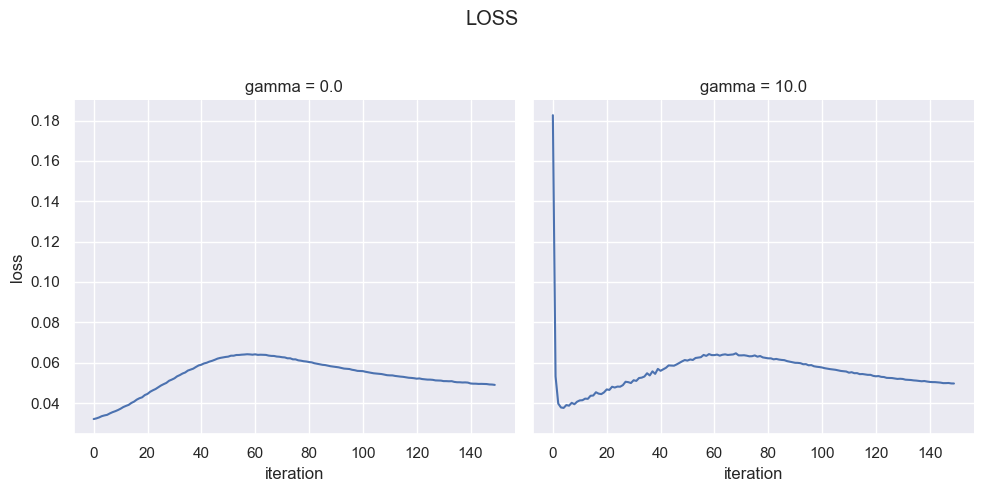

In [74]:
rel = sns.relplot(data=results_last, x='iteration', y='loss', col='gamma', kind='line')
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('LOSS')
plt.show()

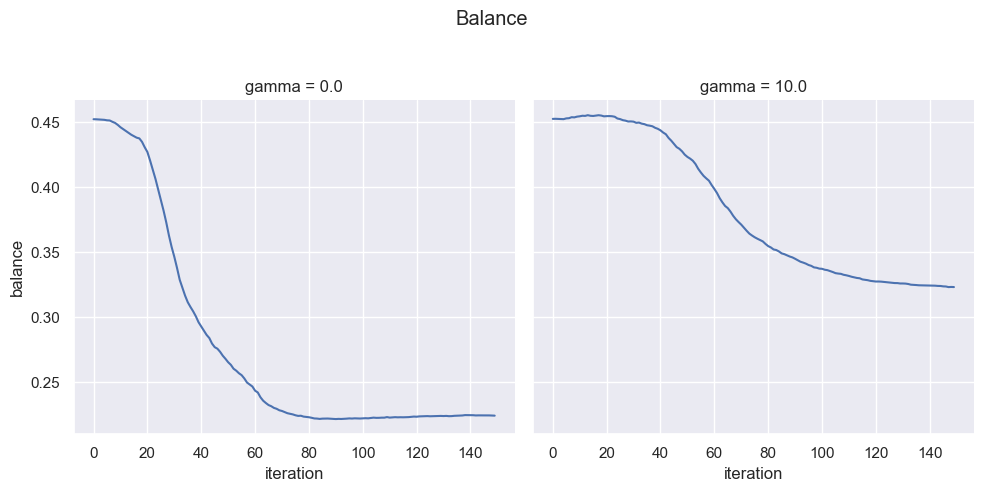

In [75]:
rel = sns.relplot(data=results_last, x='iteration', y='balance', col='gamma', kind='line')
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('Balance')
plt.show()

In [ ]:
rel = sns.relplot(data=results_last, x='gamma', y='loss', col='datasets', kind='line')
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('LOSS')
plt.show()

In [ ]:
rel = sns.relplot(data=results_last, x='gamma', y='balance', col='datasets', kind='line')
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('BALANCE')
plt.show()